In [60]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.drawing.image import Image
from openpyxl import load_workbook
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
input_file_path = 'students_scores.xlsx'
output_file_path = 'output_with_plot.xlsx'
sheet_name = 'Student'

In [62]:
# Step 1: Read the Excel sheet
df = pd.read_excel(input_file_path, sheet_name=sheet_name)
df

,Student Name,Math Score,English Score,Gender
0,Alice,85.0,90.0,Female
1,Bob,78.0,82.0,Unknown
2,Charlie,92.0,88.0,Male
3,David,74.0,76.0,Male
4,Eve,88.0,94.0,Female
5,Frank,67.0,72.0,Male
6,Grace,81.0,NaN,Female
7,Hannah,90.0,87.0,Female
8,Ivy,73.0,80.0,Female
9,Jack,86.0,89.0,Male


In [63]:
# Step 2: Clean the data
# Drop rows where 'Name' is null
df = df.dropna(subset=['Student Name'])
# Drop rows where Gender is not Male or Female and save back to df
df = df[df['Gender'].isin(['Male', 'Female'])]
df

,Student Name,Math Score,English Score,Gender
0,Alice,85.0,90.0,Female
2,Charlie,92.0,88.0,Male
3,David,74.0,76.0,Male
4,Eve,88.0,94.0,Female
5,Frank,67.0,72.0,Male
6,Grace,81.0,NaN,Female
7,Hannah,90.0,87.0,Female
8,Ivy,73.0,80.0,Female
9,Jack,86.0,89.0,Male
10,Karen,77.0,84.0,Female


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student Name   19 non-null     object 
 1   Math Score     18 non-null     float64
 2   English Score  18 non-null     float64
 3   Gender         19 non-null     object 
dtypes: float64(2), object(2)
memory usage: 760.0+ bytes


In [65]:
df.dtypes

,0
Student Name,object
Math Score,float64
English Score,float64
Gender,object


In [66]:
# Fill missing values for numeric columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
  mean_value = df[column].mean()
  df.loc[df[column].isna(), column] = mean_value

# Convert 'Name' column to uppercase
df['Student Name'] = df['Student Name'].str.upper()

In [67]:
# Step 3: Analyze the data
# Group by Gender and calculate statistics - 'max', 'min', 'mean'
analysis_df = df.groupby("Gender")[["Math Score", "English Score"]].agg({
    'Math Score': ['max', 'min', 'mean'],
    'English Score': ['max', 'min', 'mean']
})

# Display results
print(analysis_df)

       Math Score                  English Score                 
              max   min       mean           max   min       mean
Gender                                                           
Female       95.0  73.0  83.961111          96.0  80.0  87.833333
Male         93.0  67.0  79.000000          91.0  72.0  80.444444


0

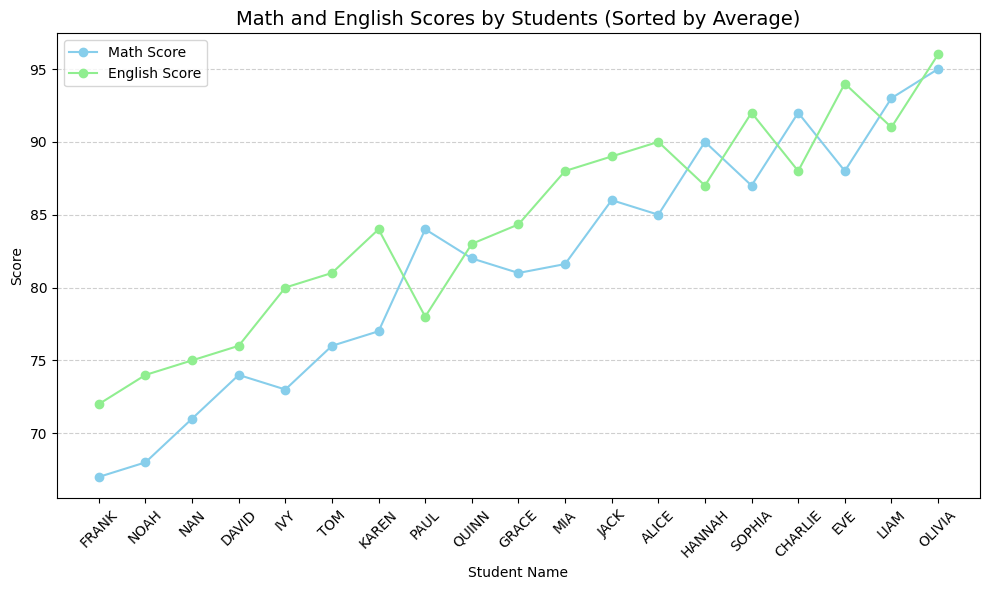

In [68]:
# Step4: Line Chart
# Calculate Average Score to Show trends in Math and English scores for students
df["Average Score"] = df[["Math Score", "English Score"]].mean(axis=1)

# Sort by Average Score
df_sorted = df.sort_values(by="Average Score")

# Plotting
plt.figure(figsize=(10, 6))

# Math scores line
plt.plot(df_sorted["Student Name"], df_sorted["Math Score"], marker='o', label="Math Score", color="skyblue")

# English scores line
plt.plot(df_sorted["Student Name"], df_sorted["English Score"], marker='o', label="English Score", color="lightgreen")

# Chart details
plt.title("Math and English Scores by Students (Sorted by Average)", fontsize=14)
plt.xlabel("Student Name")
plt.ylabel("Score")
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Save the plot to a BytesIO object
img_stream = io.BytesIO() # provides an in-memory binary stream on file object
plt.savefig(img_stream, format='png')
# Now img_stream contains the PNG image in memory
img_stream.seek(0)

In [69]:
# Step 5: Write to a new Excel file with the plot and analysis


# Create a new Excel writer
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    # Write the cleaned DataFrame to a sheet
    df.to_excel(writer, sheet_name='Data', index=False)

    # Write the analysis DataFrame to a new sheet
    analysis_df.to_excel(writer, sheet_name='Analysis')


In [70]:
# Now load the workbook to add the plot
# load_workbook is a function from the openpyxl library in Python,
# which is used to read and manipulate Excel files in the .xlsx format.
workbook = load_workbook(output_file_path)

# Create a new sheet for the plot
worksheet = workbook.create_sheet(title='Plot')

# Load the plot image
img = Image(img_stream)
worksheet.add_image(img, 'A1')

# Save the workbook with the plot included
workbook.save(output_file_path)
workbook.close()